In [ ]:
 from google.colab import drive
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/BPI Internship/NBA/WIN_DATAPREP_FINAL_MOCK.parquet')

In [ ]:
df

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
0,157105.0,2023-09-28,SNACKS,Lay's,Monthly,2023-08-09
1,374554.0,2024-03-17,HEALTH & WELLNESS,Nature's Bounty,Cost-Conscious,2022-01-08
2,374554.0,2024-03-12,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2022-01-13
3,374554.0,2022-04-03,SNACKS,Lay's,Cost-Conscious,2022-01-09
4,374554.0,2022-02-26,SNACKS,Lay's,Cost-Conscious,2022-01-09
...,...,...,...,...,...,...
179629,480556.0,2023-07-13,SNACKS,Lay's,Cost-Conscious,2023-06-08
179630,554477.0,2021-04-15,SNACKS,Lay's,Cost-Conscious,2021-02-28
179631,522219.0,2019-03-01,SNACKS,Lay's,Cost-Conscious,2019-01-22
179635,633293.0,2021-06-15,SNACKS,Lay's,Luxurious,2021-04-30


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from datetime import datetime
import pickle
import os
import warnings
warnings.filterwarnings('ignore')

# EDA

In [ ]:
# Missing Values
df.isnull().sum()

CST_ID           0
TRANS_DATE       0
PRODUCT_TYPE     0
PRODUCT_BRAND    0
SHOPPER          0
CST_SINCE        0
dtype: int64

In [ ]:
df.shape[0]

161691

In [ ]:
# Check duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
57240,854262.0,2024-03-12,SNACKS,Fiber One Bars,Monthly,2019-05-26
64854,374522.0,2022-11-12,SNACKS,Clif Bar,Monthly,2015-10-23
168480,14390.0,2022-09-27,SNACKS,Lay's,Cost-Conscious,2021-11-08


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
df.shape[0]

161688

In [ ]:
df.nunique()

CST_ID           85164
TRANS_DATE        7532
PRODUCT_TYPE         6
PRODUCT_BRAND      128
SHOPPER              4
CST_SINCE         9405
dtype: int64

In [ ]:
df['TRANS_DATE']=pd.to_datetime(df['TRANS_DATE'])

In [ ]:
# Are there more than one transactions of customers in a day?

# Group by 'CST_ID' and 'TRANS_DATE' and get the size of each group
group_sizes = df.groupby(['CST_ID', 'TRANS_DATE']).size()

# Filter to get only those groups with more than one entry
multiple_entries = group_sizes[group_sizes > 1]

# Get the pairs with more than one entry
customer_date_with_multiple_entries = multiple_entries.index
print("Customer-Date pairs with multiple entries:")
print(customer_date_with_multiple_entries)

# Filter the original DataFrame to include only the rows from the pairs with multiple entries
filtered_df = df[df.set_index(['CST_ID', 'TRANS_DATE']).index.isin(multiple_entries.index)]

print("\nData for customer-date pairs with multiple entries:")
filtered_df

Customer-Date pairs with multiple entries:
MultiIndex([(   611.0, '2019-09-26'),
            (   625.0, '2008-12-02'),
            (  1135.0, '2020-08-22'),
            (  2138.0, '2019-08-31'),
            (  2138.0, '2023-07-23'),
            (  2522.0, '2019-05-06'),
            (  3171.0, '2016-06-17'),
            (  3252.0, '2019-01-30'),
            (  3345.0, '2020-12-19'),
            (  5449.0, '2023-01-08'),
            ...
            (991741.0, '2020-02-15'),
            (991851.0, '2021-05-09'),
            (992965.0, '2023-11-15'),
            (994459.0, '2019-12-03'),
            (994637.0, '2019-06-16'),
            (995401.0, '2023-03-28'),
            (996898.0, '2023-10-02'),
            (997243.0, '2020-03-07'),
            (997933.0, '2019-10-21'),
            (998830.0, '2022-10-19')],
           names=['CST_ID', 'TRANS_DATE'], length=1427)

Data for customer-date pairs with multiple entries:


,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE
76,316363.0,2022-07-13,HEALTH & WELLNESS,Amazing Grass,Cost-Conscious,2017-06-08
77,316363.0,2022-07-13,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2017-05-31
296,423337.0,2019-04-20,SNACKS,Pringles,Cost-Conscious,2016-09-08
297,423337.0,2019-04-20,SNACKS,Lay's,Cost-Conscious,2016-09-12
334,708731.0,2019-09-19,SNACKS,Pringles,Cost-Conscious,2019-08-13
...,...,...,...,...,...,...
179256,40420.0,2019-10-16,SNACKS,Ruffles,Cost-Conscious,2019-08-27
179495,16458.0,2019-01-29,CONDIMENTS,Del Monte,Monthly,2014-02-13
179496,16458.0,2019-01-29,CONDIMENTS,Silver Swan,Monthly,2014-02-17
179552,472691.0,2024-03-19,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2014-09-19


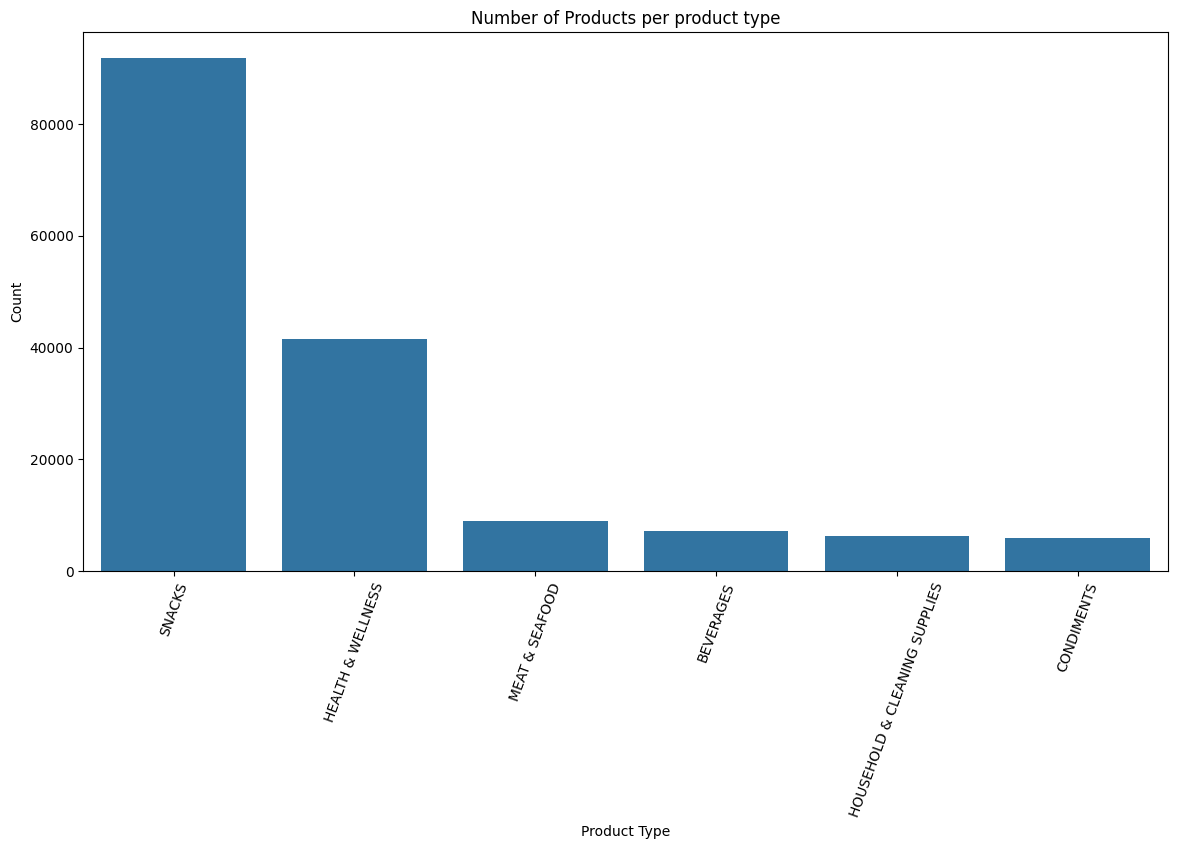

In [ ]:
plt.figure(figsize = (14,7))
sns.countplot(x='PRODUCT_TYPE', data= df, order = df.PRODUCT_TYPE.value_counts().index)
plt.title('Number of Products per product type')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Product Type')
plt.show()

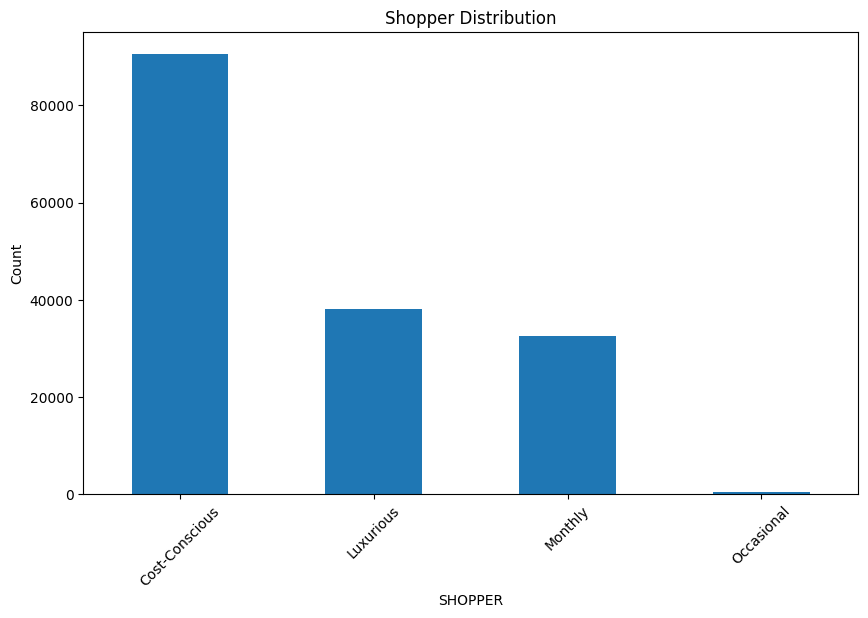

In [ ]:
data = df['SHOPPER'].value_counts()
plt.figure(figsize=(10, 6))
data.plot(kind='bar')
plt.title('Shopper Distribution')
plt.xlabel('SHOPPER')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group the data by PRODUCT_TYPE and PRODUCT_BRAND, and count the occurrences
grouped = df.groupby(['PRODUCT_TYPE', 'PRODUCT_BRAND']).size().reset_index(name='count')
grouped

,PRODUCT_TYPE,PRODUCT_BRAND,count
0,BEVERAGES,Coca-Cola,5
1,BEVERAGES,Nestlé,5259
2,BEVERAGES,San Miguel,680
3,BEVERAGES,Universal Robina,1209
4,CONDIMENTS,Ajinomoto,62
...,...,...,...
123,SNACKS,Wheat Thins,854
124,SNACKS,Wise,1
125,SNACKS,Wonderful Pistachios,1
126,SNACKS,Zing Bars,1


In [ ]:
# Get the unique product types
product_types = df['PRODUCT_TYPE'].unique()
product_types

array(['SNACKS', 'HEALTH & WELLNESS', 'MEAT & SEAFOOD', 'CONDIMENTS',
       'BEVERAGES', 'HOUSEHOLD & CLEANING SUPPLIES'], dtype=object)

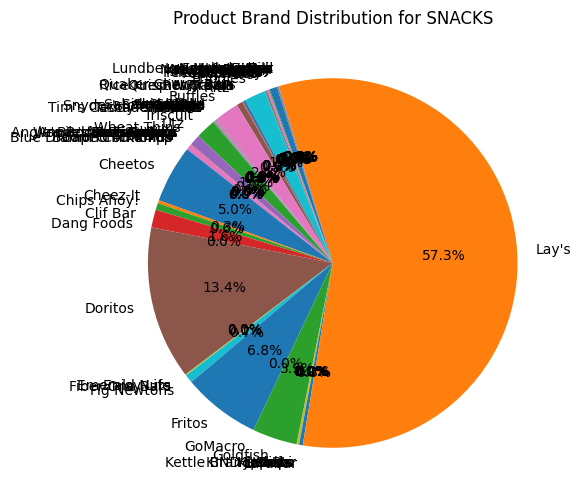

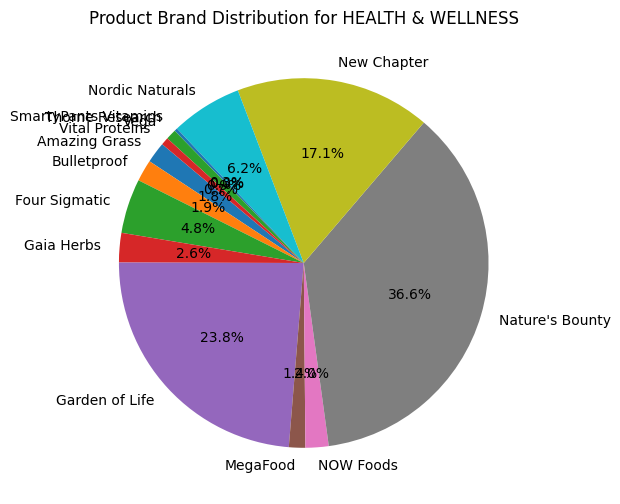

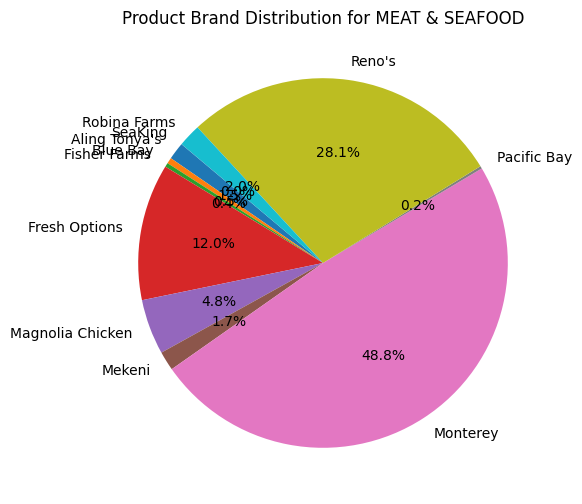

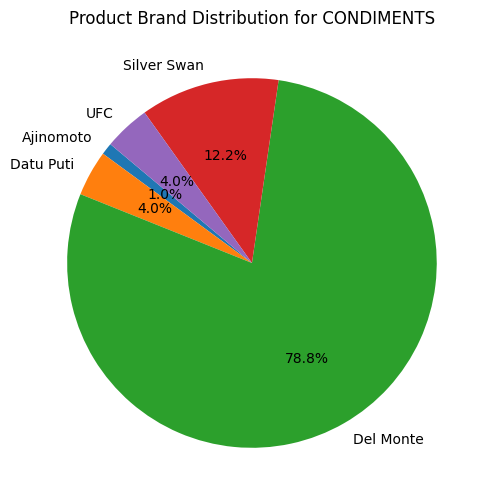

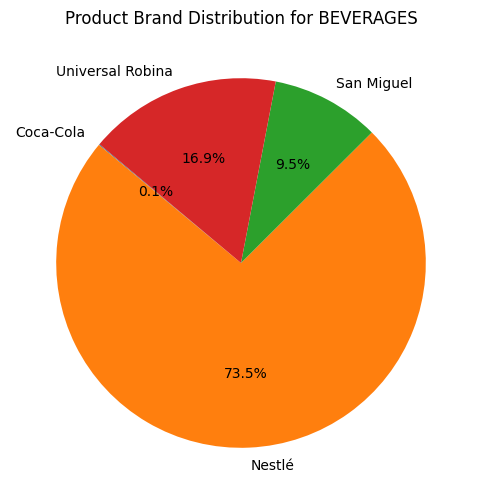

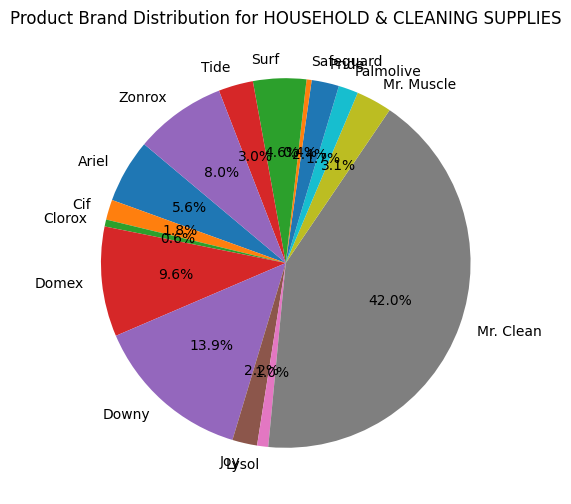

In [ ]:
# Plot pie charts for each product type
for product_type in product_types:
    plt.figure(figsize=(8, 6))

    # Filter the data for the current product type
    data = grouped[grouped['PRODUCT_TYPE'] == product_type]

    # Create a pie chart
    plt.pie(data['count'], labels=data['PRODUCT_BRAND'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Product Brand Distribution for {product_type}')

    # Show the pie chart
    plt.show()

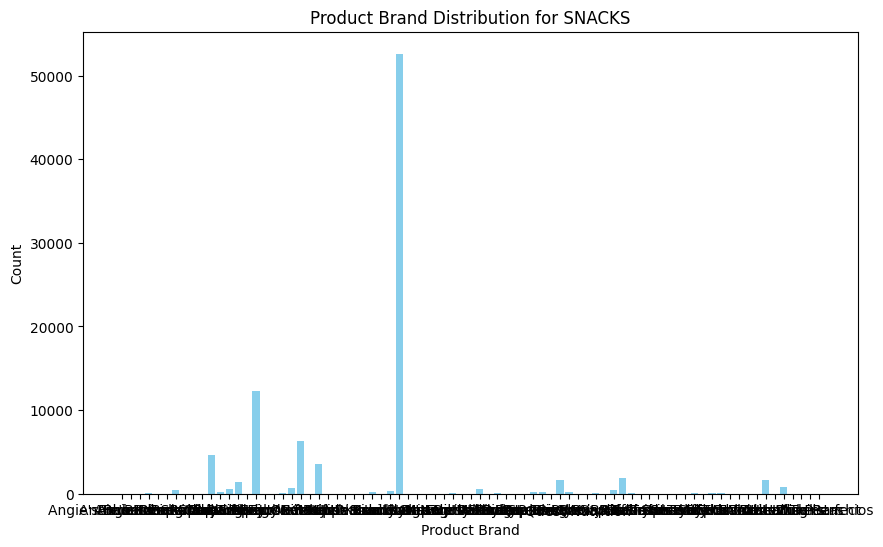

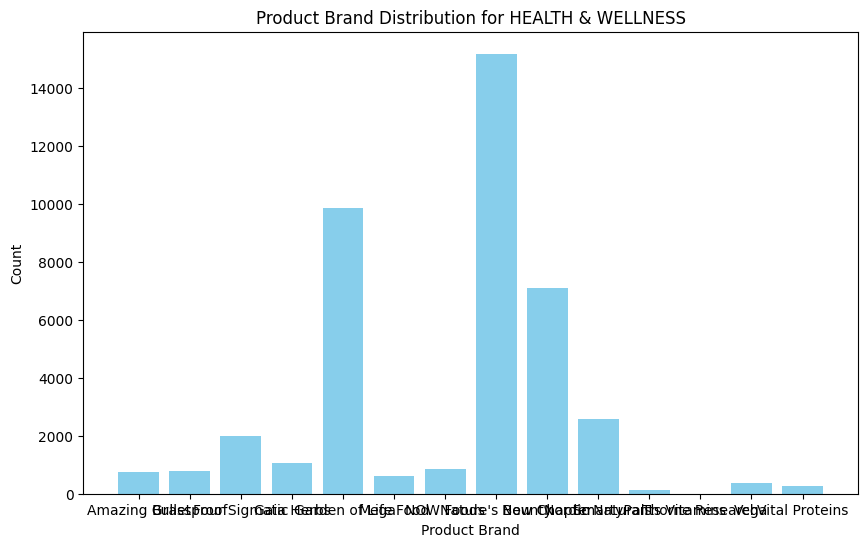

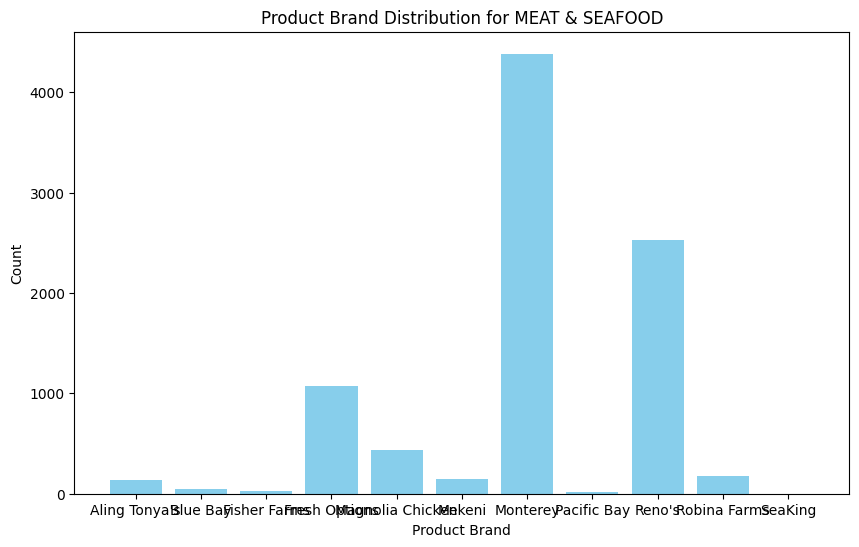

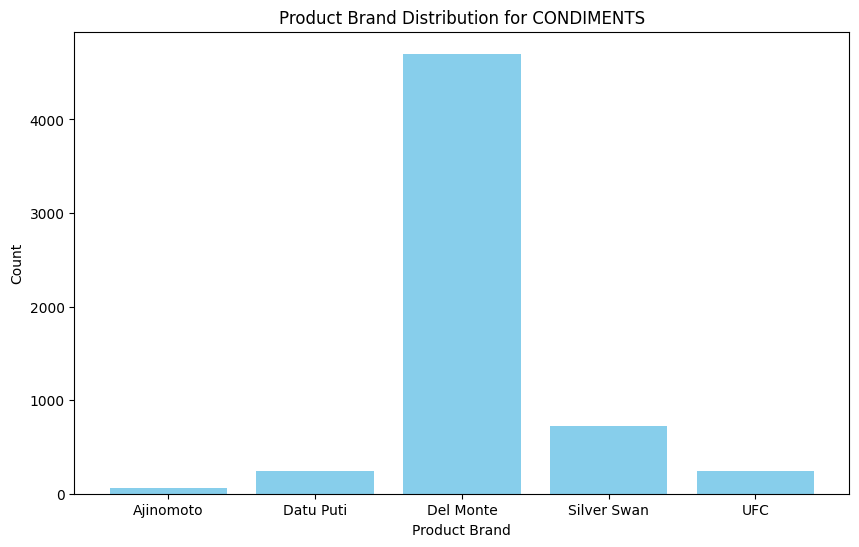

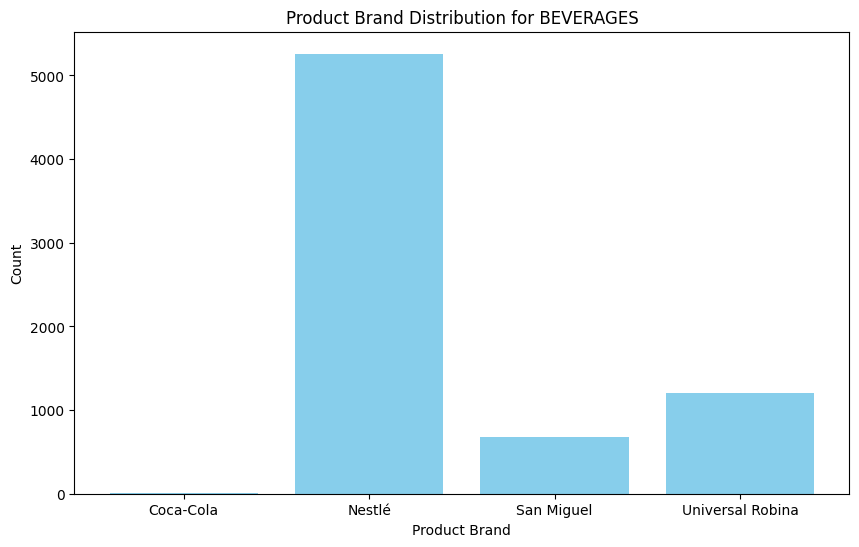

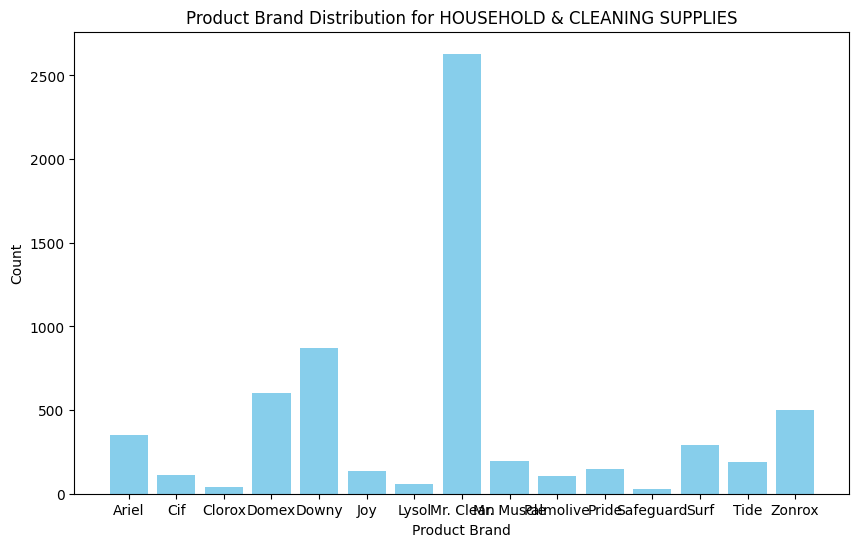

In [ ]:
# Plot bar charts for each product type
for product_type in product_types:
    plt.figure(figsize=(10, 6))

    # Filter the data for the current product type
    data = grouped[grouped['PRODUCT_TYPE'] == product_type]

    # Create a bar chart
    plt.bar(data['PRODUCT_BRAND'], data['count'], color='skyblue')
    plt.title(f'Product Brand Distribution for {product_type}')
    plt.xlabel('Product Brand')
    plt.ylabel('Count')

    # Show the bar chart
    plt.show()

In [ ]:
# Convert the date column to datetime
df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])

# Extract the day of the week from the date column (0=Monday, 6=Sunday)
df['day_of_week'] = df['TRANS_DATE'].dt.dayofweek

# Map the day of the week numbers to day names
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_name_map)

# Group by PRODUCT_TYPE and day_name, and count the occurrences
grouped = df.groupby(['PRODUCT_TYPE', 'day_name']).size().reset_index(name='count')

# Pivot the table to have days of the week as columns
pivoted = grouped.pivot(index='PRODUCT_TYPE', columns='day_name', values='count').fillna(0)

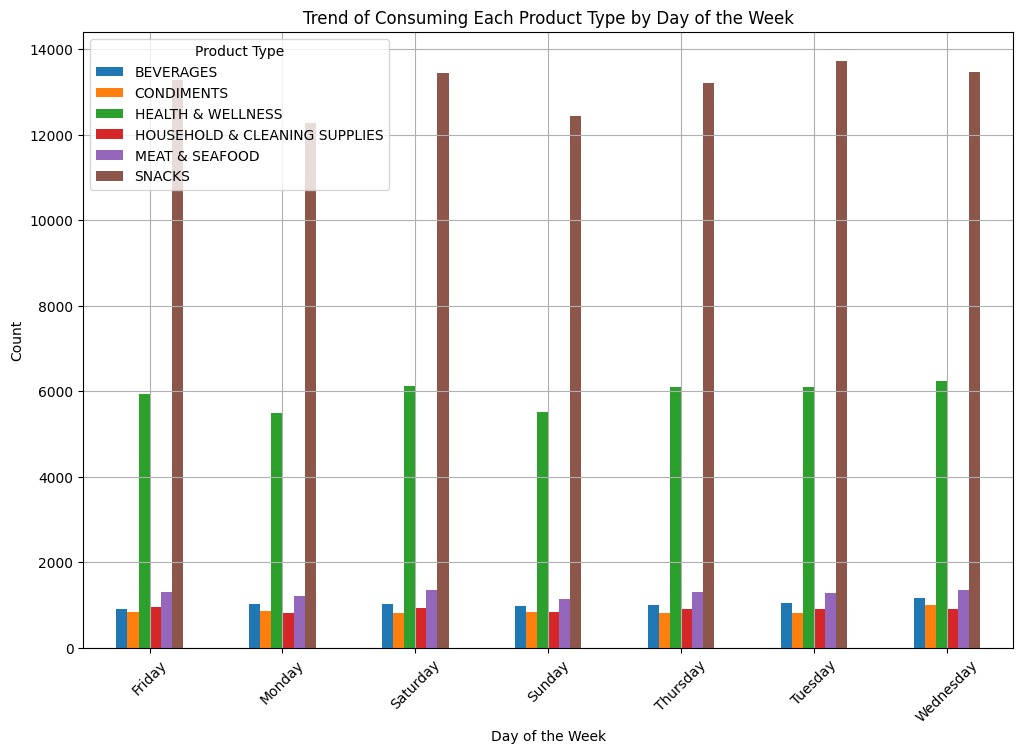

In [ ]:
# Plot the trends for each day of the week
pivoted.T.plot(kind='bar', figsize=(12, 8))
plt.title('Trend of Consuming Each Product Type by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.grid(True)
plt.show()

In [ ]:
# Extract the month from the date column
df['month'] = df['TRANS_DATE'].dt.month

# Map the month numbers to month names
month_name_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['month_name'] = df['month'].map(month_name_map)

# Group by PRODUCT_TYPE and month_name, and count the occurrences
grouped = df.groupby(['PRODUCT_TYPE', 'month_name']).size().reset_index(name='count')

# Pivot the table to have months as columns
pivoted = grouped.pivot(index='PRODUCT_TYPE', columns='month_name', values='count').fillna(0)

# Reorder the columns to follow the calendar order
pivoted = pivoted[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

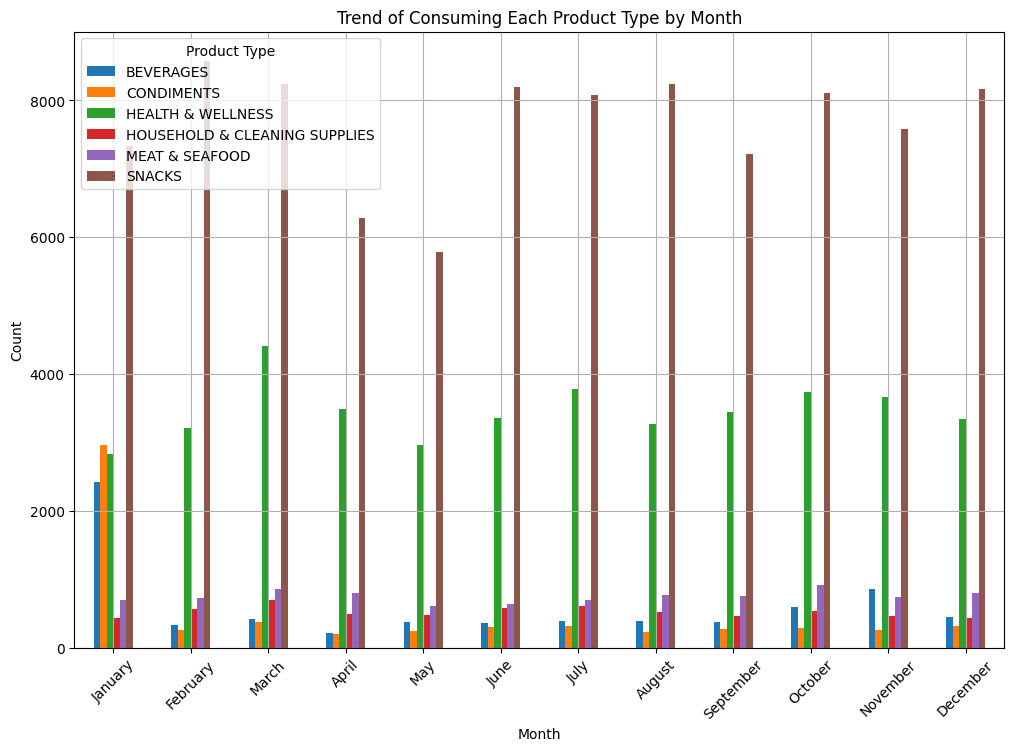

In [ ]:
# Plot the trends for each month
pivoted.T.plot(kind='bar', figsize=(12, 8))
plt.title('Trend of Consuming Each Product Type by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.grid(True)
plt.show()

In [ ]:
# Set the date column as the index
df.set_index('TRANS_DATE', inplace=True)

# Define a function to plot trends
def plot_trends(df, freq, title):
    # Resample the data to the desired frequency and count the occurrences of each PRODUCT_TYPE
    resampled = df.groupby('PRODUCT_TYPE').resample(freq).size().unstack(0, fill_value=0)

    # Plot the trends for each PRODUCT_TYPE
    resampled.plot(figsize=(12, 8), marker='o')
    plt.title(f'Trend of Consuming Each Product Type ({title})')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend(title='Product Type')
    plt.grid(True)
    plt.show()

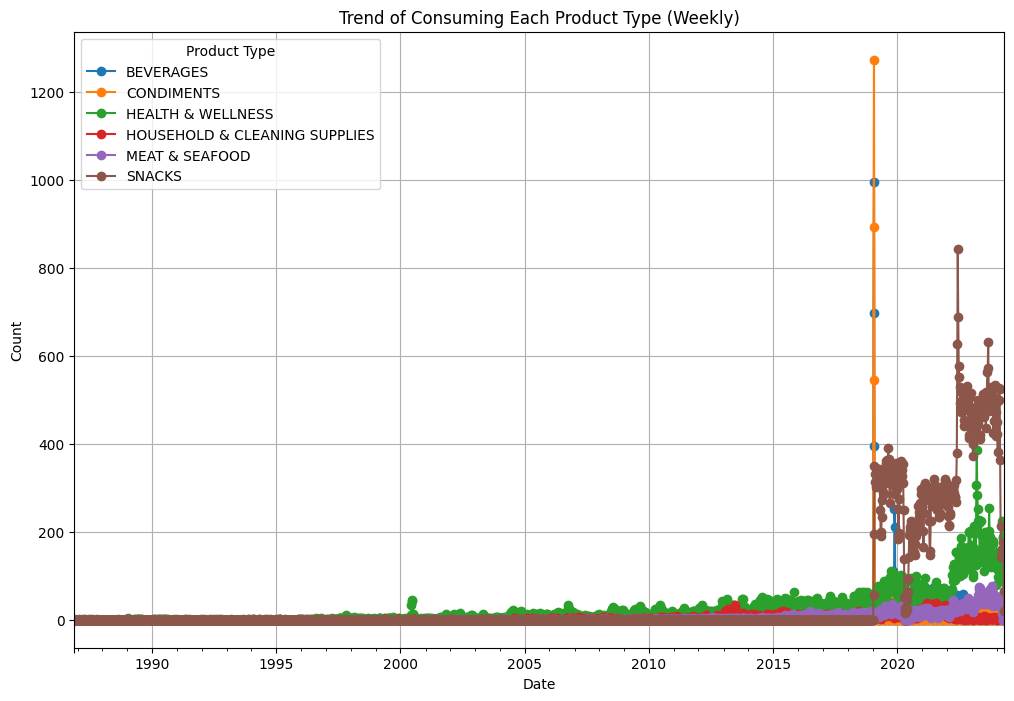

In [ ]:
# Plot weekly trends
plot_trends(df, 'W', 'Weekly')

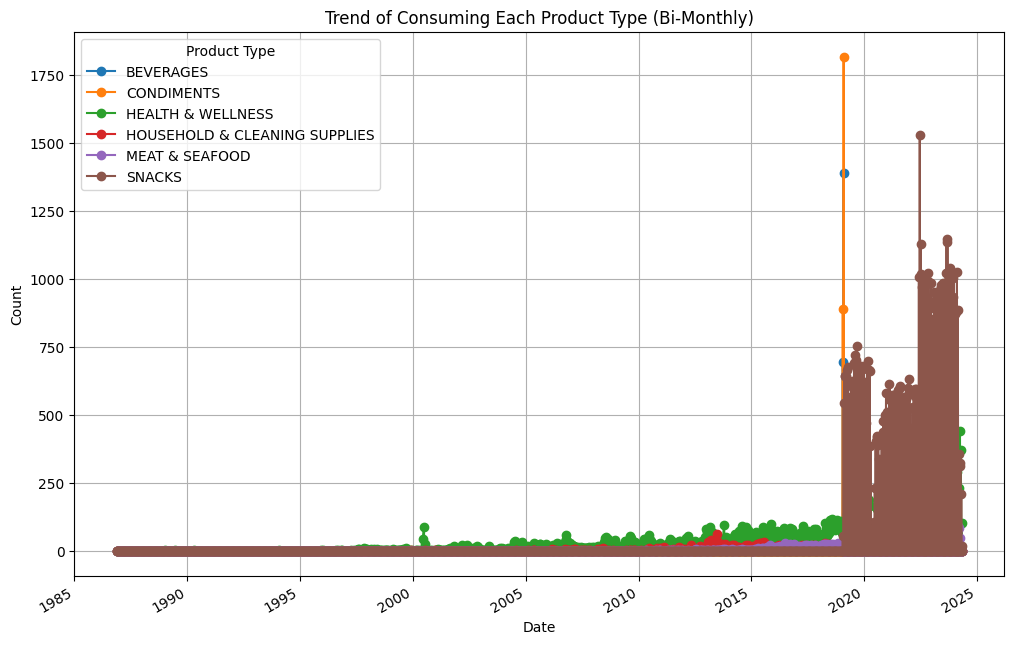

In [ ]:
# Plot bi-monthly trends (approximately every 2 weeks)
plot_trends(df, '2W', 'Bi-Monthly')

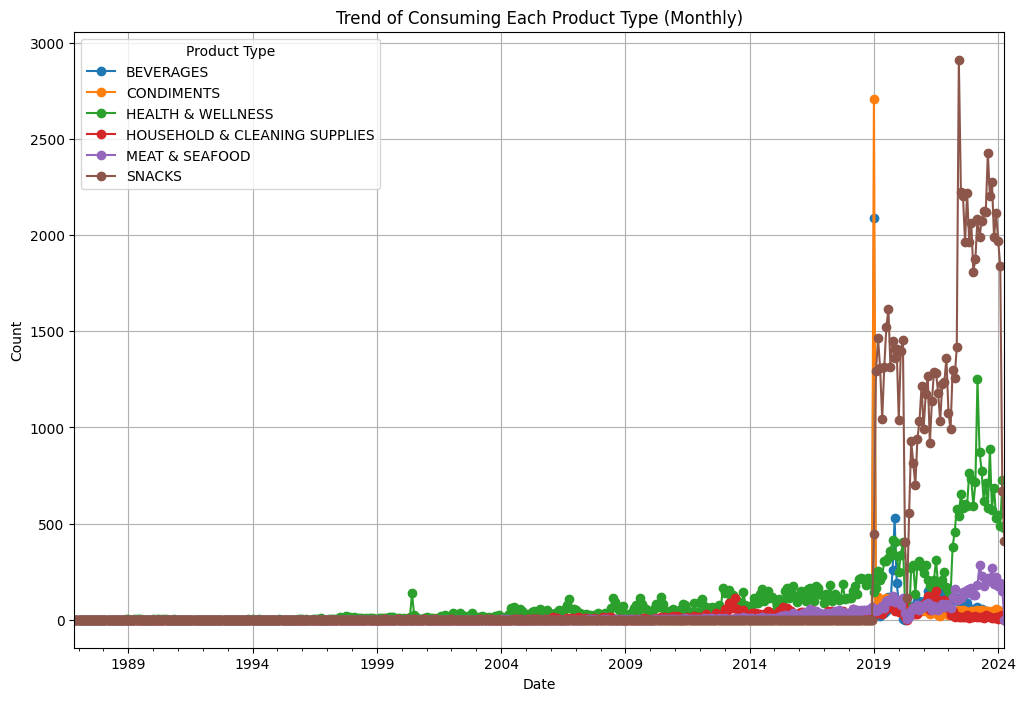

In [ ]:
# Plot monthly trends
plot_trends(df, 'M', 'Monthly')

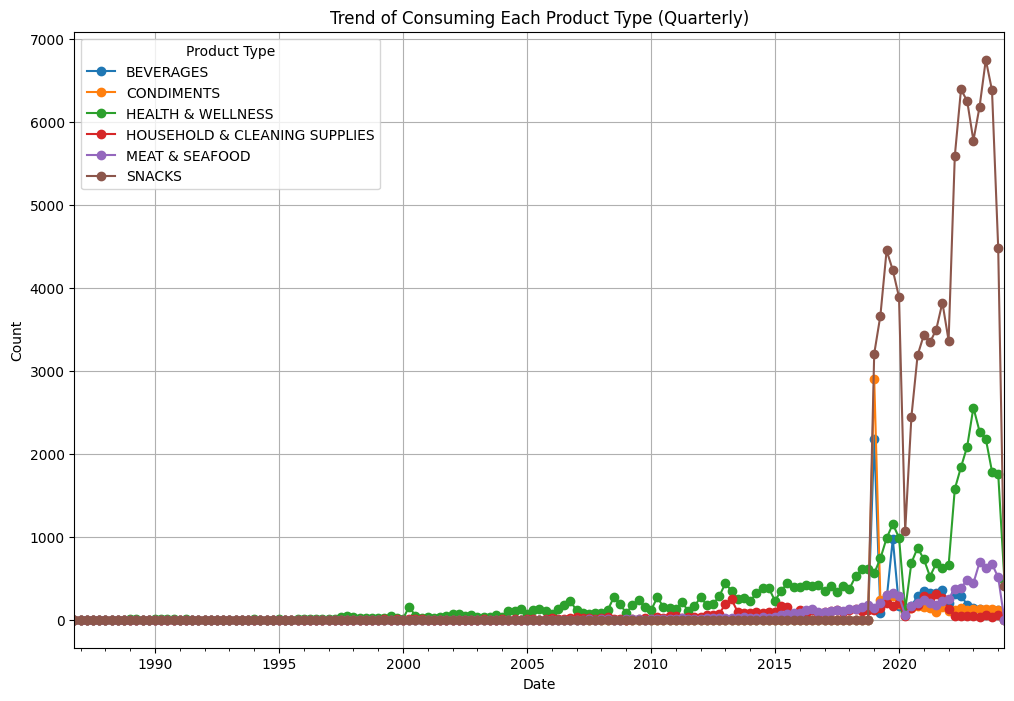

In [ ]:
# Plot quarterly trends
plot_trends(df, 'Q', 'Quarterly')

In [ ]:
df.columns

Index(['CST_ID', 'PRODUCT_TYPE', 'PRODUCT_BRAND', 'SHOPPER', 'CST_SINCE',
       'day_of_week', 'day_name', 'month', 'month_name'],
      dtype='object')

# Data Preparation

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/BPI Internship/NBA/WIN_DATAPREP_FINAL_MOCK.parquet')

In [ ]:
# Missing Values
df.isnull().sum()

CST_ID           0
TRANS_DATE       0
PRODUCT_TYPE     0
PRODUCT_BRAND    0
SHOPPER          0
CST_SINCE        0
dtype: int64

In [ ]:
# Remove duplicates - just check duplicates
# df = df.drop_duplicates()

In [ ]:
df.nunique()

CST_ID           85164
TRANS_DATE        7532
PRODUCT_TYPE         6
PRODUCT_BRAND      128
SHOPPER              4
CST_SINCE         9405
dtype: int64

In [ ]:
# PRODUCT_BRAND_ID
# Sort unique product brands and create a dictionary with IDs
unique_brands = sorted(df['PRODUCT_BRAND'].unique())
brand_to_id = {brand: idx + 1 for idx, brand in enumerate(unique_brands)}

# Map the IDs to the original DataFrame
df['PRODUCT_BRAND_ID'] = df['PRODUCT_BRAND'].map(brand_to_id)

# Create a new DataFrame with PRODUCT_BRAND and PRODUCT_ID
new_df = df[['PRODUCT_BRAND', 'PRODUCT_BRAND_ID']].drop_duplicates().reset_index(drop=True)

# Save the new DataFrame to an Excel file
new_df.to_excel('product_ids.xlsx', index=False)

# Display the new DataFrame
print(new_df)

       PRODUCT_BRAND  PRODUCT_BRAND_ID
0              Lay's                51
1    Nature's Bounty                67
2     Garden of Life                39
3           Monterey                60
4          Del Monte                26
..               ...               ...
123   Cape Cod Chips                16
124             Wise               124
125      KIND Snacks                46
126          Hippeas                43
127          SeaKing                99

[128 rows x 2 columns]


In [ ]:
# Saving the the file for reference
save_path = '/content/drive/MyDrive/BPI Internship/NBA/product_ids.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the new DataFrame to a CSV file in the specified path
new_df.to_csv(save_path, index=False)

In [ ]:
df.head()

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE,PRODUCT_BRAND_ID
0,157105.0,2023-09-28,SNACKS,Lay's,Monthly,2023-08-09,51
1,374554.0,2024-03-17,HEALTH & WELLNESS,Nature's Bounty,Cost-Conscious,2022-01-08,67
2,374554.0,2024-03-12,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2022-01-13,39
3,374554.0,2022-04-03,SNACKS,Lay's,Cost-Conscious,2022-01-09,51
4,374554.0,2022-02-26,SNACKS,Lay's,Cost-Conscious,2022-01-09,51


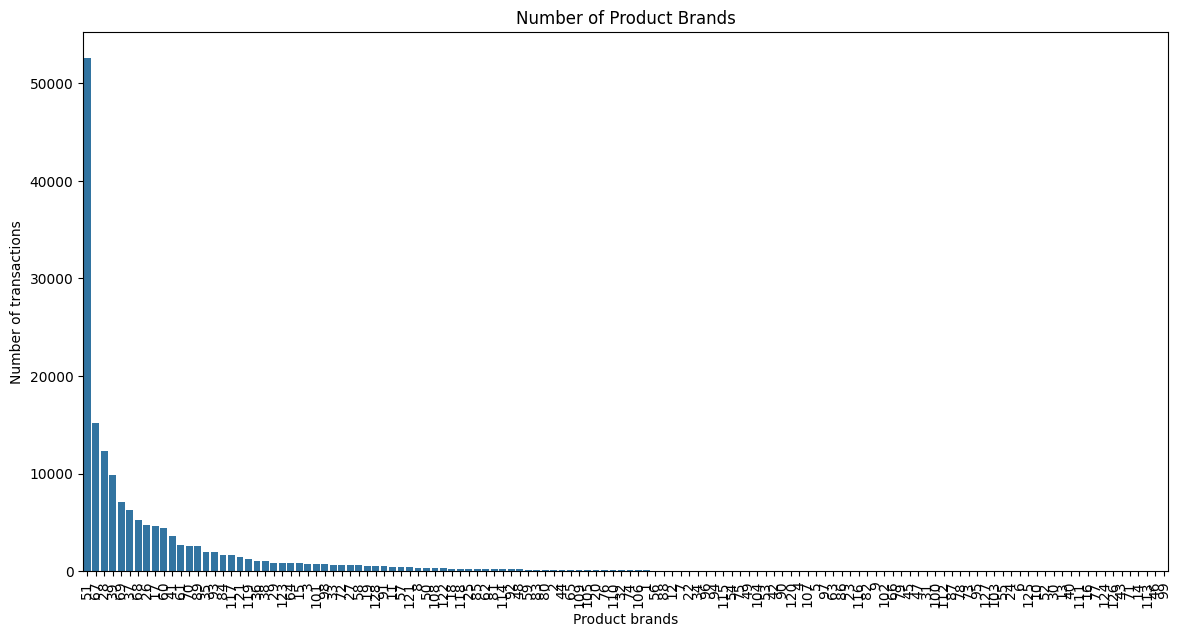

In [ ]:
# Calculate the counts for each PRODUCT_BRAND_ID and sort by count
brand_counts = df['PRODUCT_BRAND_ID'].value_counts().sort_values(ascending=False)

# Create a sorted categorical type for PRODUCT_BRAND_ID
df['PRODUCT_BRAND_ID'] = pd.Categorical(df['PRODUCT_BRAND_ID'], categories=brand_counts.index, ordered=True)

# Plot the count plot
plt.figure(figsize=(14, 7))
sns.countplot(x='PRODUCT_BRAND_ID', data=df, order=brand_counts.index)
plt.title('Number of Product Brands')
plt.xticks(rotation=90)
plt.ylabel('Number of transactions')
plt.xlabel('Product brands')
plt.show()

Text(0.5, 0, 'Product Brand')

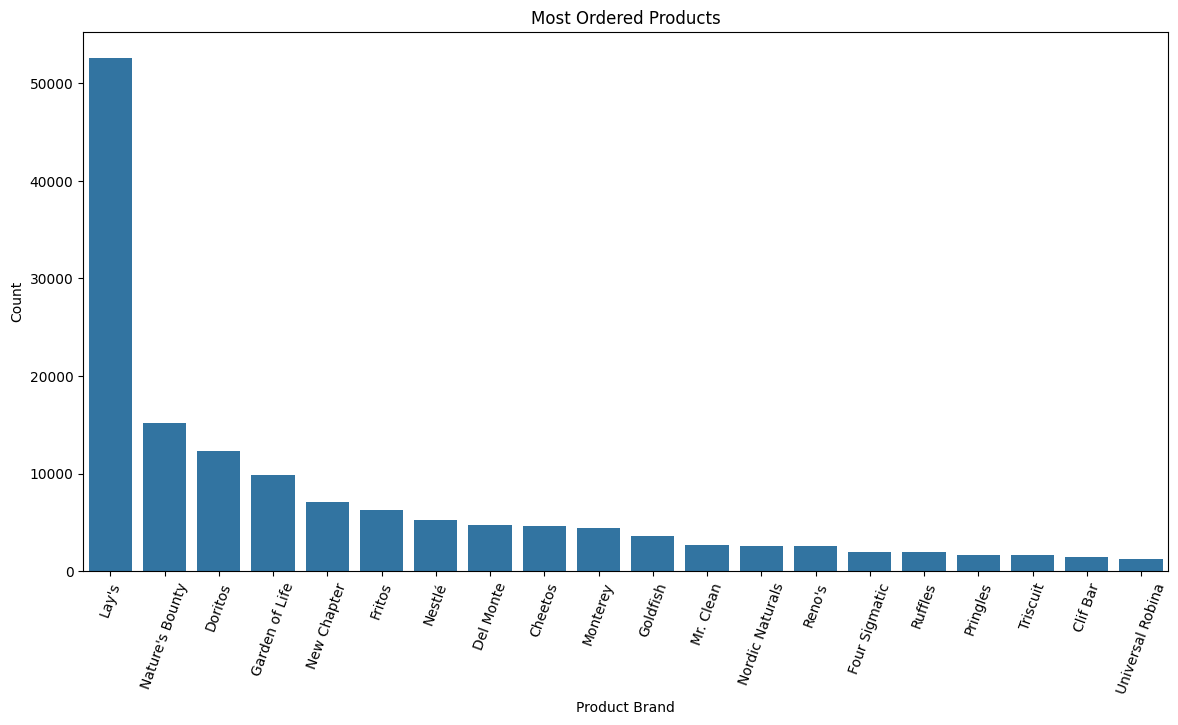

In [ ]:
plt.figure(figsize = (14,7))
sns.countplot(x='PRODUCT_BRAND', data= df,
              order = df.PRODUCT_BRAND.value_counts().index[:20])
plt.title('Most Ordered Products')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Product Brand')

In [ ]:
df['TRANS_DATE']=pd.to_datetime(df['TRANS_DATE'])

In [ ]:
# Group by CST_ID and PRODUCT_BRAND_ID and count the occurrences
grouped_df = df.groupby(['CST_ID', 'PRODUCT_BRAND_ID']).size().reset_index(name='REORDERED')

# Merge the reordered counts back to the original DataFrame
df = df.merge(grouped_df, on=['CST_ID', 'PRODUCT_BRAND_ID'])

# Display the updated DataFrame
df

,CST_ID,TRANS_DATE,PRODUCT_TYPE,PRODUCT_BRAND,SHOPPER,CST_SINCE,PRODUCT_BRAND_ID,REORDERED
0,157105.0,2023-09-28,SNACKS,Lay's,Monthly,2023-08-09,51,1
1,374554.0,2024-03-17,HEALTH & WELLNESS,Nature's Bounty,Cost-Conscious,2022-01-08,67,1
2,374554.0,2024-03-12,HEALTH & WELLNESS,Garden of Life,Cost-Conscious,2022-01-13,39,1
3,374554.0,2022-04-03,SNACKS,Lay's,Cost-Conscious,2022-01-09,51,2
4,374554.0,2022-02-26,SNACKS,Lay's,Cost-Conscious,2022-01-09,51,2
...,...,...,...,...,...,...,...,...
161686,480556.0,2023-07-13,SNACKS,Lay's,Cost-Conscious,2023-06-08,51,1
161687,554477.0,2021-04-15,SNACKS,Lay's,Cost-Conscious,2021-02-28,51,1
161688,522219.0,2019-03-01,SNACKS,Lay's,Cost-Conscious,2019-01-22,51,1
161689,633293.0,2021-06-15,SNACKS,Lay's,Luxurious,2021-04-30,51,1


In [ ]:
df_reordered = df[['CST_ID', 'PRODUCT_BRAND', 'PRODUCT_BRAND_ID', 'REORDERED']] #only the needed columns
df_reordered

,CST_ID,PRODUCT_BRAND,PRODUCT_BRAND_ID,REORDERED
0,157105.0,Lay's,51,1
1,374554.0,Nature's Bounty,67,1
2,374554.0,Garden of Life,39,1
3,374554.0,Lay's,51,2
4,374554.0,Lay's,51,2
...,...,...,...,...
161686,480556.0,Lay's,51,1
161687,554477.0,Lay's,51,1
161688,522219.0,Lay's,51,1
161689,633293.0,Lay's,51,1


In [ ]:
df_reordered['REORDERED'].value_counts()

REORDERED
1      139887
2       15728
3        3414
4        1200
5         355
6         150
7         126
125       125
8          88
15         75
9          63
12         60
18         54
13         52
43         43
39         39
17         34
34         34
11         33
16         32
14         28
27         27
24         24
10         20
Name: count, dtype: int64

In [ ]:
# df with the needed columns only
df_reordered_desc = df[['CST_ID', 'PRODUCT_BRAND_ID', 'REORDERED']]
df_reordered_desc

,CST_ID,PRODUCT_BRAND_ID,REORDERED
0,157105.0,51,1
1,374554.0,67,1
2,374554.0,39,1
3,374554.0,51,2
4,374554.0,51,2
...,...,...,...
161686,480556.0,51,1
161687,554477.0,51,1
161688,522219.0,51,1
161689,633293.0,51,1


<Axes: ylabel='Frequency'>

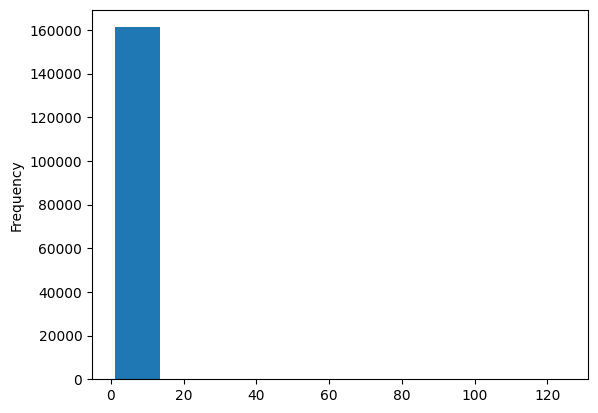

In [ ]:
df_reordered_desc['REORDERED'].plot(kind='hist')

## ALS

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=fd1feedfbee260fb4d85a4b1137277b225d89526de7fbbaad0e40275f5e8211d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357254 sha256=c6f59b0a7722fbcbe3cf1f4597afb2626f4c475fedbe6775fbf8c608649fd178
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
df_reordered_desc.head()

,CST_ID,PRODUCT_BRAND_ID,REORDERED
0,157105.0,51,1
1,374554.0,67,1
2,374554.0,39,1
3,374554.0,51,2
4,374554.0,51,2


In [ ]:
df_reordered_desc.head()

,CST_ID,PRODUCT_BRAND_ID,REORDERED
0,157105.0,51,1
1,374554.0,67,1
2,374554.0,39,1
3,374554.0,51,2
4,374554.0,51,2


In [ ]:
# Create Spark session
spark = SparkSession.builder.appName('ALSRecommendation').getOrCreate()

# Convert pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df_reordered_desc)

# Select required columns and rename them for ALS
als_data = spark_df.selectExpr('CST_ID as userId', 'PRODUCT_BRAND_ID as itemId', 'REORDERED as rating')

# Show the data
als_data.show()

+--------+------+------+
|  userId|itemId|rating|
+--------+------+------+
|157105.0|    51|     1|
|374554.0|    67|     1|
|374554.0|    39|     1|
|374554.0|    51|     2|
|374554.0|    51|     2|
|688694.0|    39|     1|
|688694.0|    67|     1|
|688694.0|    60|     1|
|688694.0|    26|     1|
|265381.0|    51|     1|
|955415.0|    60|     1|
|955415.0|    67|     1|
|955415.0|    39|     1|
|955415.0|    26|     1|
|  4280.0|    64|     1|
|  4280.0|    67|     1|
|  4280.0|    51|     1|
|514674.0|    51|     1|
|800352.0|    51|     2|
|800352.0|    51|     2|
+--------+------+------+
only showing top 20 rows



In [ ]:
# Initialize the ALS model
als = ALS(
    maxIter=10,
    regParam=0.1,
    userCol="userId",
    itemCol="itemId",
    ratingCol="rating",
    coldStartStrategy="drop"
)

# Split the data into training and test sets
(training, test) = als_data.randomSplit([0.8, 0.2])

# Train the model
model = als.fit(training)

In [ ]:
# Make predictions
predictions = model.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print(f"Root-mean-square error = {rmse}")

# Show some predictions
predictions.show()

Root-mean-square error = 0.5560723909946562
+--------+------+------+----------+
|  userId|itemId|rating|prediction|
+--------+------+------+----------+
|   833.0|    51|     1|0.86005974|
| 74775.0|    51|     1| 0.8957777|
| 92644.0|    26|     1| 1.0706583|
| 92644.0|    67|     2| 1.3524215|
|101775.0|    38|     1| 0.4612678|
|136625.0|    39|     1|  1.580954|
|141952.0|    67|     1|0.52960104|
|158803.0|    15|     1| 1.0242188|
|158803.0|    35|     1| 1.0356001|
|158803.0|    69|     2| 1.2725475|
|207398.0|    39|     1|0.77532303|
|207398.0|    51|     1|0.75115234|
|244597.0|    28|     1| 0.5183057|
|294744.0|    37|     1|0.74406594|
|294744.0|    39|     1|0.77946657|
|296288.0|    28|     1|0.80137104|
|380922.0|    51|     3| 2.8267024|
|382396.0|    51|     1|0.81183696|
|450950.0|    69|     1| 0.9217423|
|480179.0|    37|     1|0.84227955|
+--------+------+------+----------+
only showing top 20 rows



Test (High Rating)

In [ ]:
df_reordered_desc[df_reordered_desc['REORDERED'] == 125]

,CST_ID,PRODUCT_BRAND_ID,REORDERED
118059,324028.0,21,125
118060,324028.0,21,125
118061,324028.0,21,125
118062,324028.0,21,125
118063,324028.0,21,125
...,...,...,...
118179,324028.0,21,125
118180,324028.0,21,125
118181,324028.0,21,125
118182,324028.0,21,125


In [ ]:
# Example: Predict rating for a specific customer and product
new_data = spark.createDataFrame([
    (324028.0	, 21),  # customerId, Product they always buy
], ["userId", "itemId"])

# Predict ratings for the new data
new_predictions = model.transform(new_data)
new_predictions.show()

+--------+------+----------+
|  userId|itemId|prediction|
+--------+------+----------+
|324028.0|    21| 124.97165|
+--------+------+----------+



In [ ]:
# Example: Predict rating for a specific customer and product
new_data = spark.createDataFrame([
    (324028.0	, 51),  # customerId, Lay's
], ["userId", "itemId"])

# Predict ratings for the new data
new_predictions = model.transform(new_data)
new_predictions.show()

+--------+------+----------+
|  userId|itemId|prediction|
+--------+------+----------+
|324028.0|    51| 2.7017534|
+--------+------+----------+



## SVD Preparation

In [ ]:
# Get the combination of CST_ID and PRODUCT_BRAND_ID and count the number of times a customer ordered a particular brand

# Initialize an empty list to store the processed data
data = []

# Define the columns for the processed data
data_columns = ['CST_ID', 'PRODUCT_BRAND_ID', 'COUNT']

# Iterate over each unique customer ID in the dataframe
for user in df_reordered.CST_ID.unique():
    # For the current user, get the count of each PRODUCT_BRAND_ID they have purchased
    counts = df_reordered[df_reordered['CST_ID'] == user].PRODUCT_BRAND_ID.value_counts()

    # Iterate over the counts of each PRODUCT_BRAND_ID for the current user
    for i in range(len(counts)):
        # Append the user ID, product brand ID, and count to the data list
        data.append([user, counts.index[i], counts.values[i]])

In [ ]:
# save as dataframe
rec_df = pd.DataFrame(data, columns=data_columns)
rec_df

,CST_ID,PRODUCT_BRAND_ID,COUNT
0,157105.0,51,1
1,157105.0,67,0
2,157105.0,102,0
3,157105.0,9,0
4,157105.0,82,0
...,...,...,...
10900987,871744.0,57,0
10900988,871744.0,11,0
10900989,871744.0,91,0
10900990,871744.0,128,0


In [ ]:
df_reordered[df_reordered['CST_ID'] == 157105.0].PRODUCT_BRAND_ID.value_counts()

PRODUCT_BRAND_ID
51     1
67     0
102    0
9      0
82     0
      ..
57     0
11     0
91     0
128    0
99     0
Name: count, Length: 128, dtype: int64

In [ ]:
# Saving the file for use later
csv_file_path = '/content/drive/MyDrive/BPI Internship/NBA/rec_df.csv'
rec_df.to_csv(csv_file_path, index=False)

In [ ]:
rec_df

,CST_ID,PRODUCT_BRAND_ID,COUNT
0,157105.0,51,1
1,157105.0,67,0
2,157105.0,102,0
3,157105.0,9,0
4,157105.0,82,0
...,...,...,...
10900987,871744.0,57,0
10900988,871744.0,11,0
10900989,871744.0,91,0
10900990,871744.0,128,0


In [ ]:
#No one bought anything more than 125 times.
rec_df['COUNT'].max()

125

In [ ]:
# Minimum is zero meaning, did not order the product
rec_df['COUNT'].min()

0

In [ ]:
# Count of the number of orders
# there are 10,534,898 customer/product combinations with zero count
rec_df['COUNT'].value_counts()

COUNT
0      10751637
1        139887
2          7864
3          1138
4           300
5            71
6            25
7            18
8            11
9             7
12            5
15            5
13            4
18            3
11            3
14            2
16            2
10            2
17            2
125           1
39            1
27            1
34            1
24            1
43            1
Name: count, dtype: int64

# MODEL BUILDING

In [ ]:
! pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357265 sha256=6f2ef2fdc947b2bb0d399123b0dada097dde9b001e890b2a8d0d3f7285d753b5
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
#from surprise import KNNBaseline
#from surprise import KNNBasic
from surprise.model_selection import train_test_split
#from surprise.prediction_algorithms import knns
#from surprise.similarities import cosine, msd, pearson
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.model_selection import GridSearchCV
from surprise import accuracy

In [ ]:
# Path to the CSV file
file_path = '/content/drive/MyDrive/BPI Internship/NBA/rec_df.csv'

# Read the CSV file into a DataFrame
rec_df = pd.read_csv(file_path)

In [ ]:
rec_df['COUNT'].value_counts() #sparcity

COUNT
0      10751637
1        139887
2          7864
3          1138
4           300
5            71
6            25
7            18
8            11
9             7
12            5
15            5
13            4
18            3
11            3
14            2
16            2
10            2
17            2
125           1
39            1
27            1
34            1
24            1
43            1
Name: count, dtype: int64

In [ ]:
# Filter out zero counts (another trial if excluding zeroes)
# rec_df = rec_df[rec_df['COUNT'] > 0]

In [ ]:
# Define rating scale based on your data (assuming count values range from 1 to the maximum count in your dataset)
max_count = rec_df['COUNT'].max()
max_count

125

Picking a random user to look at one of their ratings

## (0-5) rating

In [ ]:
# Create a Reader object with the specified rating scale
reader = Reader(rating_scale=(0,125)) # rating is from 0 to max (initial)

#NOTE: also tried (0-125) to compare recommendations

# The columns must correspond to CST-ID, PRODUCT_BRAND_ID and ratings (in that order).
rec_data = Dataset.load_from_df(rec_df, reader)

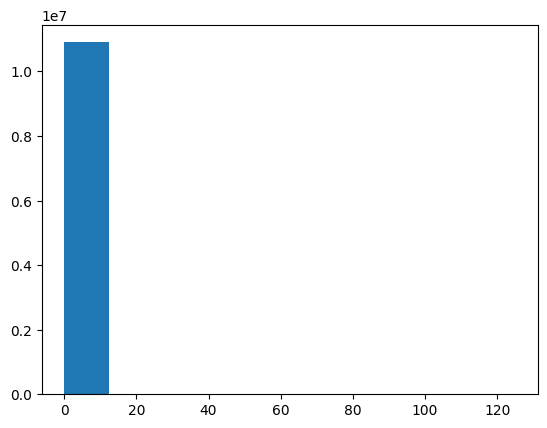

In [ ]:
plt.hist(rec_df['COUNT']);

In [ ]:
# There are so few above 5 I think I can group them all together
rec_df['rating'] = rec_df['COUNT'].apply(lambda x: 5 if (x >= 5) else x)

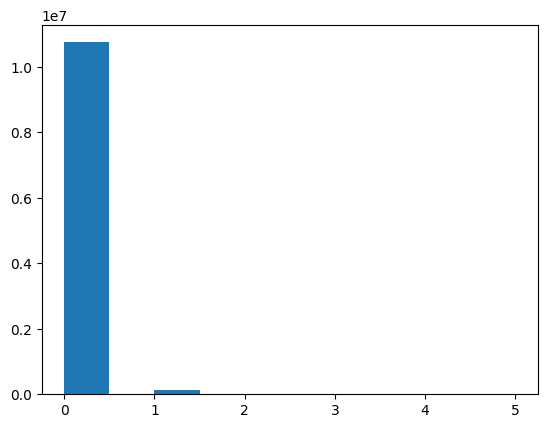

In [ ]:
plt.hist(rec_df['rating']);

In [ ]:
new_rec_df = rec_df.drop(columns='COUNT')
new_rec_df.tail()

,CST_ID,PRODUCT_BRAND_ID,rating
10900987,871744.0,57,0
10900988,871744.0,11,0
10900989,871744.0,91,0
10900990,871744.0,128,0
10900991,871744.0,99,0


In [ ]:
import pickle
import os

# Saving a DataFrame rec_df as a pickle file

# Create the directory if it doesn't exist
os.makedirs("Pickle", exist_ok=True)


In [ ]:
pickle.dump(new_rec_df, open("Pickle/new_rec_df.p", "wb"))

In [ ]:
new_rec_df = pickle.load(open("Pickle/new_rec_df.p", "rb"))

In [ ]:
new_rec_df

,CST_ID,PRODUCT_BRAND_ID,rating
0,157105.0,51,1
1,157105.0,67,0
2,157105.0,102,0
3,157105.0,9,0
4,157105.0,82,0
...,...,...,...
10900987,871744.0,57,0
10900988,871744.0,11,0
10900989,871744.0,91,0
10900990,871744.0,128,0


In [ ]:
# Passing pieces of dataframe in FLASK to be put back together there
pickle.dump(new_rec_df.columns.values,open('Pickle/rec_columns.p','wb'))
pickle.dump(new_rec_df.index.values, open('Pickle/rec_index.p', 'wb'))
pickle.dump(new_rec_df.CST_ID.values, open('Pickle/rec_user.p', 'wb'))
pickle.dump(new_rec_df.rating.values, open('Pickle/rec_rating.p', 'wb'))
pickle.dump(new_rec_df.PRODUCT_BRAND_ID.values, open('Pickle/rec_prod_id.p', 'wb'))

In [ ]:
rec_columns = pickle.load(open('Pickle/rec_columns.p','rb'))
rec_index = pickle.load(open('Pickle/rec_index.p', 'rb'))
rec_user = pickle.load(open('Pickle/rec_user.p', 'rb'))
rec_rating = pickle.load(open('Pickle/rec_rating.p', 'rb'))
rec_prod_id = pickle.load(open('Pickle/rec_prod_id.p', 'rb'))

In [ ]:
new_df = pd.DataFrame(np.column_stack([rec_user, rec_prod_id, rec_rating]), index=rec_index, columns=rec_columns)

In [ ]:
new_df

,CST_ID,PRODUCT_BRAND_ID,rating
0,157105.0,51.0,1.0
1,157105.0,67.0,0.0
2,157105.0,102.0,0.0
3,157105.0,9.0,0.0
4,157105.0,82.0,0.0
...,...,...,...
10900987,871744.0,57.0,0.0
10900988,871744.0,11.0,0.0
10900989,871744.0,91.0,0.0
10900990,871744.0,128.0,0.0


In [ ]:
# New Reader
tic = time.time()
reader = Reader(rating_scale=(0, 5)) #change to (1-5)
readtime = time.time()-tic
print(readtime)
# The columns must correspond to user id, item id and ratings (in that order).
toc = time.time()
new_rec_data = Dataset.load_from_df(new_rec_df, reader)
loadtime = time.time()-toc
print(loadtime)
# sample random trainset and testset
# test set is made of 25% of the ratings.
tac = time.time()
new_trainset, new_testset = train_test_split(new_rec_data, test_size=.25, random_state=12)
splittime = time.time()-tac
print(splittime)

0.0001418590545654297
14.539632081985474
35.37228870391846


In [ ]:
new_svd_algo = SVD()

new_svd_algo.fit(new_trainset)

new_predictions = new_svd_algo.test(new_testset)

# Then compute RMSE
rmse = accuracy.rmse(new_predictions)
print('RMSE:', rmse)

# Compute and print MAE (Mean Absolute Error)
mae = accuracy.mae(new_predictions)
print('MAE:', mae)

RMSE: 0.1176
RMSE: 0.11762597338602604
MAE:  0.0256
MAE: 0.025590973989926057


In [ ]:
# Compute and print MAPE (Mean Absolute Percentage Error)
def calculate_mape(predictions):
    actual = [pred.r_ui for pred in predictions]
    predicted = [pred.est for pred in predictions]
    mape = np.mean([abs((a - p) / a) for a, p in zip(actual, predicted) if a != 0]) * 100
    return mape

mape = calculate_mape(new_predictions)
print('MAPE:', mape)

MAPE: 77.2244456141341


### Looking at a particular user

In [ ]:
rec_df.head()

,CST_ID,PRODUCT_BRAND_ID,COUNT,rating
0,157105.0,51,1,1
1,157105.0,67,0,0
2,157105.0,102,0,0
3,157105.0,9,0,0
4,157105.0,82,0,0


In [ ]:
rec_df[rec_df['CST_ID'] == 157105.0]

,CST_ID,PRODUCT_BRAND_ID,COUNT,rating
0,157105.0,51,1,1
1,157105.0,67,0,0
2,157105.0,102,0,0
3,157105.0,9,0,0
4,157105.0,82,0,0
...,...,...,...,...
123,157105.0,57,0,0
124,157105.0,11,0,0
125,157105.0,91,0,0
126,157105.0,128,0,0


In [ ]:
uid=157105.0
iid=51
pred = new_svd_algo.predict(uid, iid, r_ui=1, verbose=True)

user: 157105.0   item: 51         r_ui = 5.00   est = 0.55   {'was_impossible': False}


In [ ]:
new_testset[1]

(65742.0, 128, 0.0)

In [ ]:
pred = new_svd_algo.predict(65742.0, 128, r_ui=0, verbose=True)

user: 65742.0    item: 128        r_ui = 0.00   est = 0.00   {'was_impossible': False}


In [ ]:
new_predictions[0]

Prediction(uid=156904.0, iid=13, r_ui=0.0, est=0, details={'was_impossible': False})

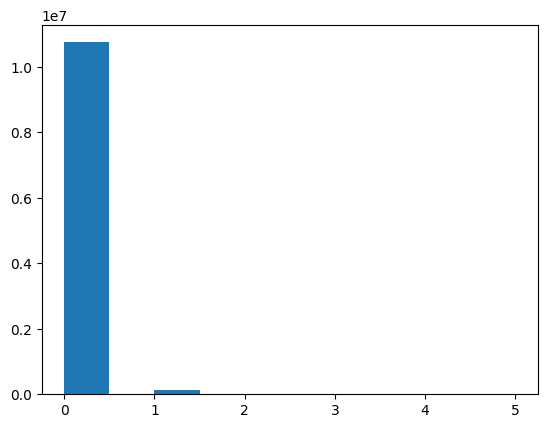

In [ ]:
plt.hist(rec_df['rating']);

In [ ]:
# Get top predictions for a user

from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# First train an SVD algorithm on the dataset.
# data = Dataset.load_builtin('ml-100k')
# trainset = data.build_full_trainset()
# algo = SVD()
# algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
# anti_testset = new_trainset.build_anti_testset()
# predictions = anti_new_svd_best_gs.test(anti_testset)

In [ ]:
top_n = get_top_n(new_predictions, n=5) # for rating (0-5), use the default not the model that is tuned because it crashes

In [ ]:
top_n

defaultdict(list,
            {156904.0: [(28, 0.12129975912075178),
              (60, 0.041273588711056644),
              (41, 0.013246827550138252),
              (61, 0.011270449104746644),
              (117, 0.009056185332248648)],
             65742.0: [(89, 0.020463550398084035),
              (61, 0.01811742596550949),
              (38, 0.00703112018992875),
              (3, 0.006066345580588278),
              (58, 0.0034006966044647837)],
             453473.0: [(67, 0.2138703515538748),
              (69, 0.08378637150361234),
              (68, 0.060133355667040686),
              (17, 0.05231976604269443),
              (15, 0.015705429909946094)],
             322454.0: [(70, 0.03986100290547325),
              (93, 0.02288140664044414),
              (38, 0.007275616050059078),
              (36, 0.003916138866657338),
              (58, 0.002025284127317116)],
             28379.0: [(51, 0.5401718704457095),
              (39, 0.09842256534730506),
              (37

In [ ]:
# Initialize an empty list to store rows
rows = []

# Loop through the top_n dictionary
for user_id, item_ratings in top_n.items():
    for item_id, rating in item_ratings:
        rows.append([user_id, item_id, rating])

# Create a DataFrame
top_n_df = pd.DataFrame(rows, columns=['user_id', 'item_id', 'rating'])

# Display the DataFrame
top_n_df

,user_id,item_id,rating
0,156904.0,28,0.121300
1,156904.0,60,0.041274
2,156904.0,41,0.013247
3,156904.0,61,0.011270
4,156904.0,117,0.009056
...,...,...,...
425815,288114.0,51,0.607329
425816,288114.0,69,0.073491
425817,288114.0,26,0.045927
425818,288114.0,89,0.029879


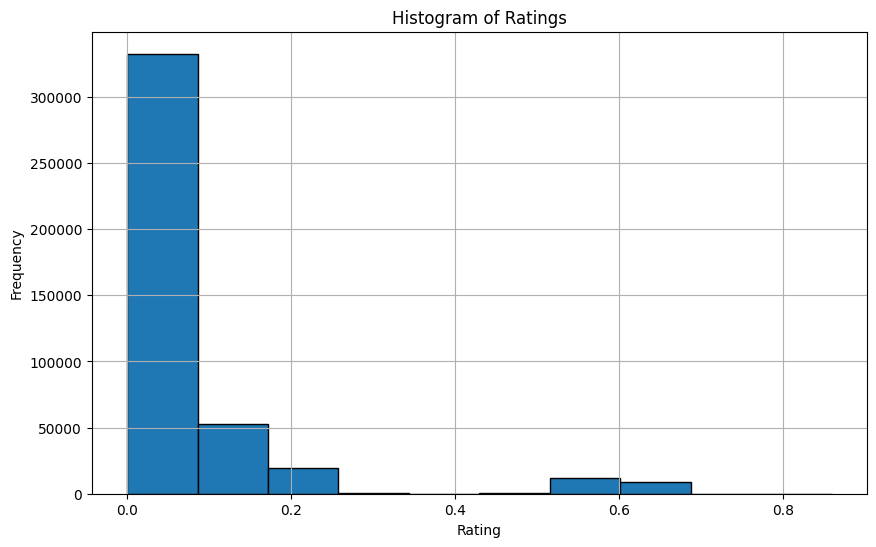

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(top_n_df['rating'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.grid(True)
plt.show()

In [ ]:
399338.0 in top_n

True

In [ ]:
top_n[399338.0]

[(67, 0.19563874797999253),
 (28, 0.139197555810023),
 (39, 0.13860036914381957),
 (69, 0.08461794837083124),
 (70, 0.055118236553307005)]

In [ ]:
len(top_n.values())

85164

In [ ]:
all_rec_items=[]  # Making a list of all recommended items in the top for each user, then count them
for idx in range(len(top_n.values())-20000):
    all_rec_items.extend([x[0] for x in [*top_n.values()][idx]]) # product_ids recommended for user

In [ ]:
# retrieve the top 20 most common reccommended items
from collections import Counter

ctr = Counter(all_rec_items)
most_ctr = ctr.most_common(20)

In [ ]:
most_ctr

[(67, 16601),
 (69, 16576),
 (51, 16459),
 (37, 16379),
 (28, 16376),
 (68, 16229),
 (39, 16211),
 (17, 16028),
 (60, 15976),
 (26, 15312),
 (70, 15147),
 (35, 15090),
 (93, 13538),
 (41, 13075),
 (89, 11532),
 (21, 11131),
 (61, 9219),
 (117, 7602),
 (38, 7310),
 (3, 6364)]

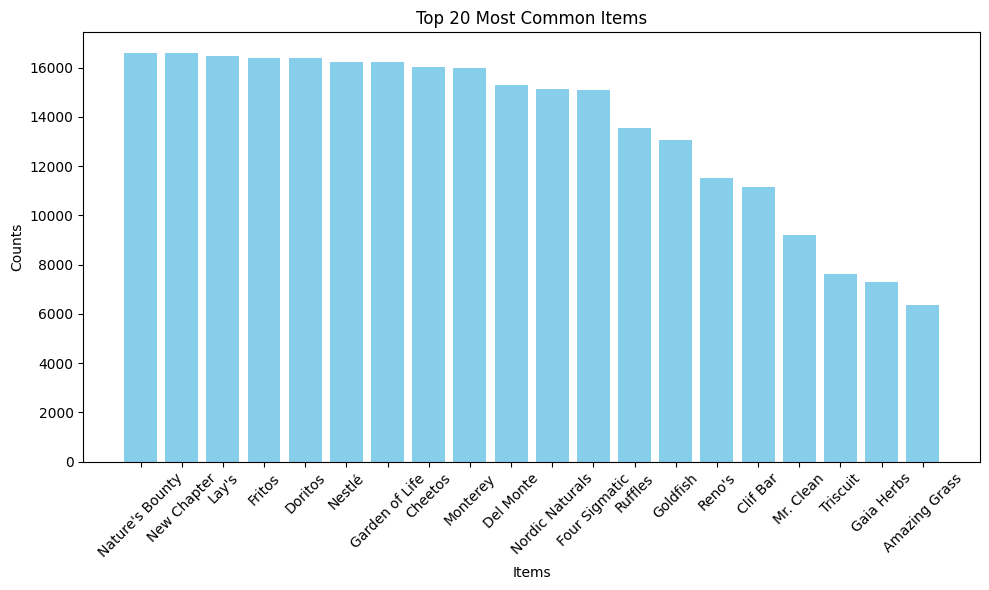

In [ ]:
# Rename items using DataFrame df
renamed_items = [df[df['PRODUCT_BRAND_ID'] == x[0]]['PRODUCT_BRAND'].iloc[0] for x in most_ctr]
items, counts = zip(*most_ctr)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(renamed_items, counts, color='skyblue')
plt.xlabel('Items')
plt.ylabel('Counts')
plt.title('Top 20 Most Common Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Get recommendations for a new user

In [ ]:
products_desc = pickle.load(open("Pickle/products_desc.p", "rb"))

In [ ]:
df

In [ ]:
def grocery_rater(df, num, aisle=None):
    userID = 300000
    rating_list = []
    while num > 0:
        if aisle:
            product = df[df['PRODUCT_TYPE'].str.contains(aisle)].sample(1)
        else:
            product = df.sample(1)
        print('\n', product['PRODUCT_BRAND'].iloc[0])
        rating = input('How do you rate this product on a scale of 1-5, choose 0 to rate a different product:\n')
        if rating == '0':
            continue
        else:
            rating_one_product = {'CST_ID':userID,'PRODUCT_BRAND_ID':product['PRODUCT_BRAND_ID'].iloc[0],'rating':int(rating)}
            rating_list.append(rating_one_product)
            num -= 1
    return rating_list

In [ ]:
user_rating = grocery_rater(df, 5, aisle='SNACKS')

In [ ]:
user_rating

In [ ]:
#Next:
# add the new ratings to the original ratings DataFrame
# train a model using the new combined DataFrame
# make predictions for the user